# Introduction

Hello everyone! This is my data analysis on the Hotel Booking dataset, and this is the first time that I will try to analyze the data and define my own question and solve it. I am very excited! Now, let's us first take a look at our data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
full_data = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [3]:
full_data.shape

(119390, 32)

In [4]:
full_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
print("The parameters are:")
print(full_data.columns.unique())
len(full_data.columns.unique())

The parameters are:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


32

In [6]:
print("Following columns contain missing values:")
print(full_data.columns[full_data.isna().any()].unique())
len(full_data.columns[full_data.isna().any()].unique())

Following columns contain missing values:
Index(['children', 'country', 'agent', 'company'], dtype='object')


4

So we just had a quick look at the data. There are 119390 rows with 32 parameters, and four of the parameters have missing values. Let's now look deeper into these four columns and see how many values are missed.

In [7]:
print("Number of empty values in children column: ", full_data['children'].isnull().sum())
print("Percentage： ", full_data['children'].isnull().sum() / full_data.shape[0] * 100)

Number of empty values in children column:  4
Percentage：  0.003350364352123293


In [8]:
print("Number of empty values in country column: ", full_data['country'].isnull().sum())
print("Percentage： ", full_data['country'].isnull().sum() / full_data.shape[0] * 100)

Number of empty values in country column:  488
Percentage：  0.40874445095904177


In [9]:
print("Number of empty values in agent column: ", full_data['agent'].isnull().sum())
print("Percentage： ", full_data['agent'].isnull().sum() / full_data.shape[0] * 100)

Number of empty values in agent column:  16340
Percentage：  13.686238378423655


In [10]:
print("Number of empty values in company column: ", full_data['company'].isnull().sum())
print("Percentage： ", full_data['company'].isnull().sum() / full_data.shape[0] * 100)

Number of empty values in company column:  112593
Percentage：  94.30689337465449


So from the above we can see the exact number of rows with missing values in each column, and it is shown that the company column has essentially 94.3% values missing! This basically means that we should not use the company column for further data analysis as there are too many missing values. So let's just drop this column.

In [11]:
full_data = full_data.drop(['company'], axis=1)

In [12]:
full_data.shape

(119390, 31)

In [13]:
full_data.columns.unique()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Univariate Data analysis

Now we have see the general picture of our data. I say we can explore some of the columns deeper and visualize their distributions and check outliers and other characteristics. Let's begin!

**Hotel**

From this column, we can see that more people(almost double) prefer to book a city hotel. This may be intuitive because a city hotel is usually cheaper than a resort hotel. 

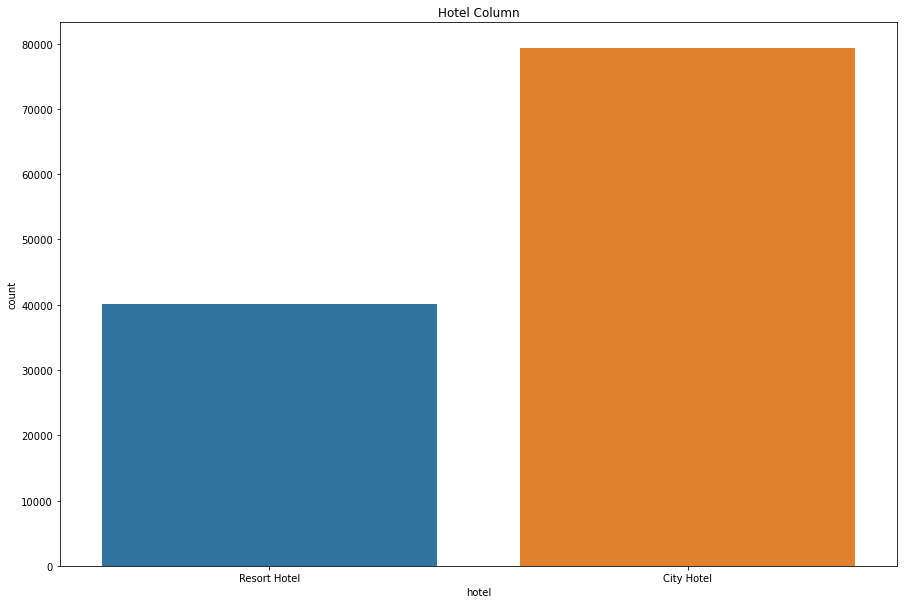

Percentages: 
City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64


In [14]:
plt.figure(figsize=(15, 10))
plt.title("Hotel Column")
sns.countplot(x=full_data['hotel'])
plt.show()

print("Percentages: ")
print(full_data['hotel'].value_counts() / full_data.shape[0] * 100)

**is_canceled**

From this column, we can see that more people(almost double) tend to not cancel their bookings. 

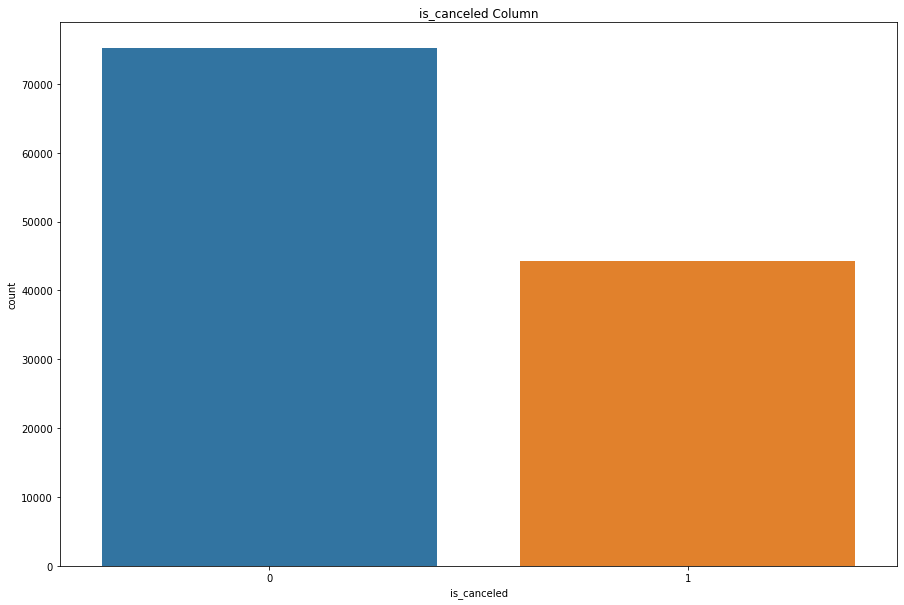

Percentages: 
0    62.958372
1    37.041628
Name: is_canceled, dtype: float64


In [15]:
plt.figure(figsize=(15, 10))
plt.title("is_canceled Column")
sns.countplot(x=full_data['is_canceled'])
plt.show()

print("Percentages: ")
print(full_data['is_canceled'].value_counts() / full_data.shape[0] * 100)

**lead_time**

So here we see that this column is highly right-skewed. Most people only book the hotel a few days before they go, but there is people who book two years prior to their check in!

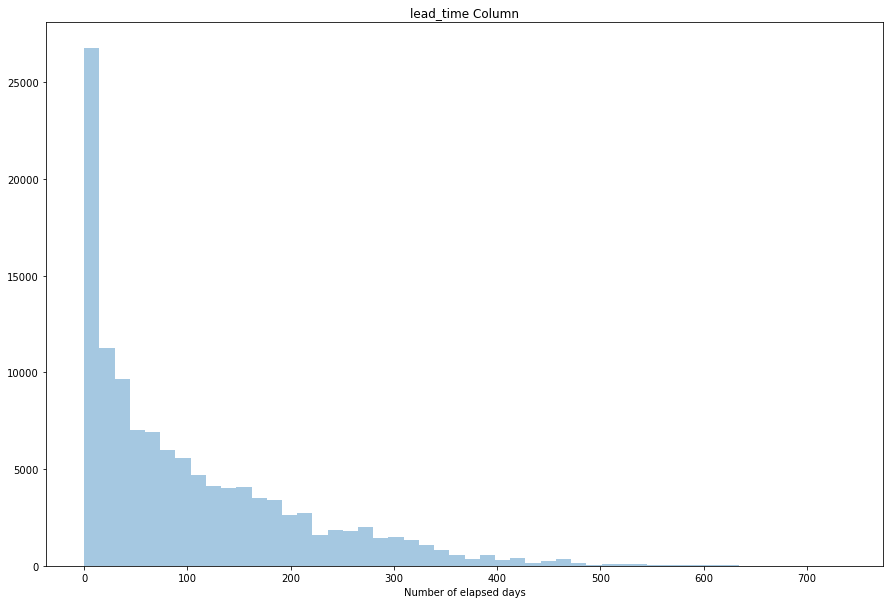

In [16]:
plt.figure(figsize=(15, 10))
plt.title("lead_time Column")
sns.distplot(a=full_data['lead_time'], kde=False, axlabel="Number of elapsed days")
plt.show()

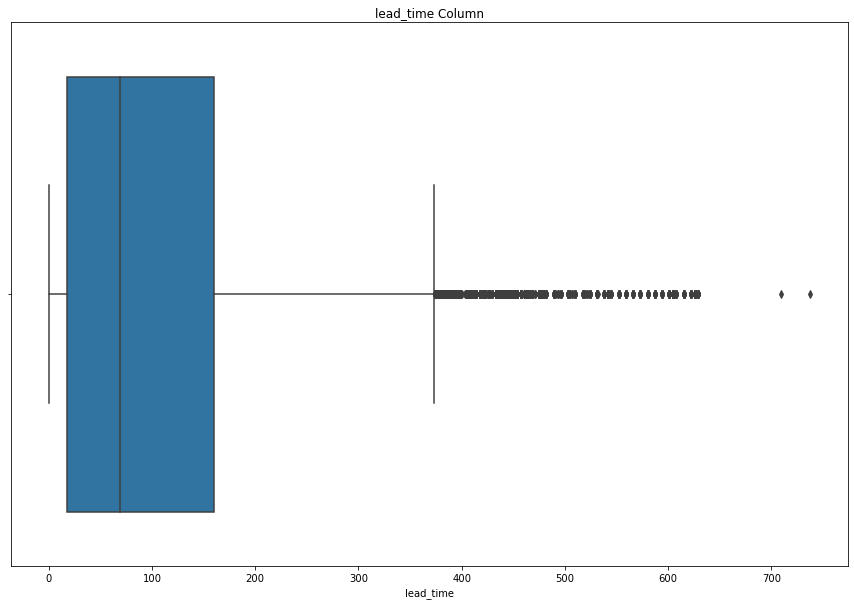

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


In [17]:
plt.figure(figsize=(15, 10))
plt.title("lead_time Column")
sns.boxplot(x=full_data['lead_time'])
plt.show()

print(full_data['lead_time'].describe())

**Arrival Month**

So from this column, we see that there is a slighly increase in arrivings during summer, which is also intuitive because most families can travel together during summer because kids are in vocation. 

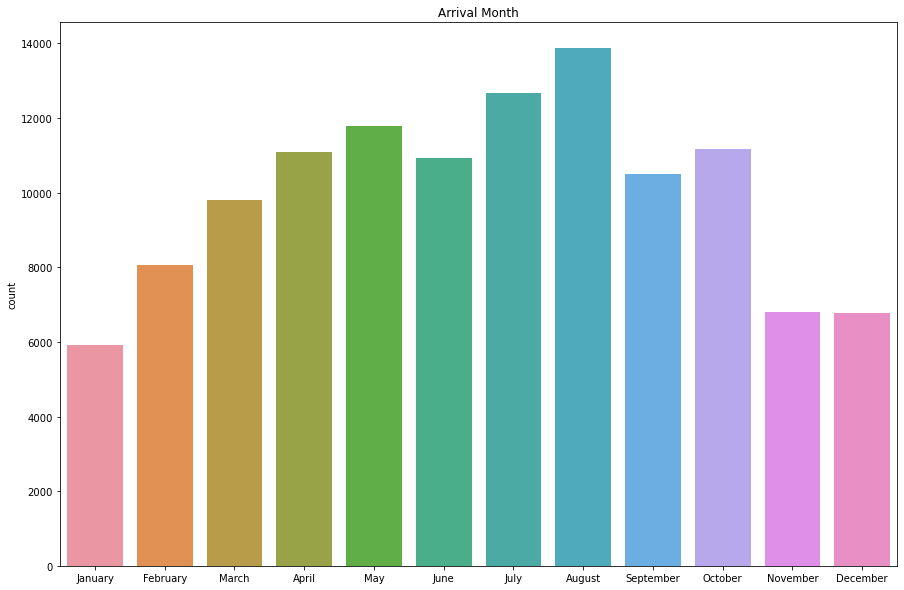

Percentages: 
January       4.966078
February      6.757685
March         8.203367
April         9.288048
May           9.876037
June          9.162409
July         10.604741
August       11.623252
September     8.801407
October       9.347517
November      5.690594
December      5.678868
dtype: float64


In [18]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

sorted_month = pd.Categorical(full_data["arrival_date_month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(15, 10))
plt.title("Arrival Month")
sns.countplot(x=sorted_month)
plt.show()

print("Percentages: ")
print(sorted_month.value_counts() / full_data.shape[0] * 100)

**stays_in_weekend_nights**

So most people actually don't stay overnight during weekends, but there are people who basically lived in the hotel for a few weeks.

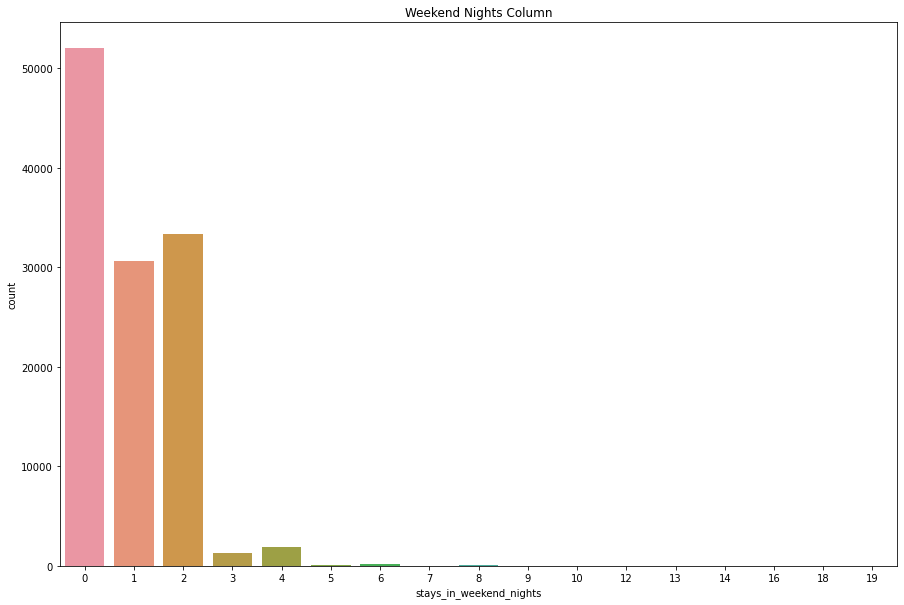

Percentages: 
0     43.553061
2     27.898484
1     25.652065
4      1.553731
3      1.054527
6      0.128151
5      0.066170
8      0.050255
7      0.015914
9      0.009214
10     0.005863
12     0.004188
13     0.002513
16     0.002513
14     0.001675
18     0.000838
19     0.000838
Name: stays_in_weekend_nights, dtype: float64


In [19]:
plt.figure(figsize=(15, 10))
plt.title("Weekend Nights Column")
sns.countplot(x=full_data['stays_in_weekend_nights'])
plt.show()

print("Percentages: ")
print(full_data['stays_in_weekend_nights'].value_counts() / full_data.shape[0] * 100)

**Number of adults**

So most groups consist of two adults, which is normal. Those customers with 20 or 50 adults are likely to be tourist groups

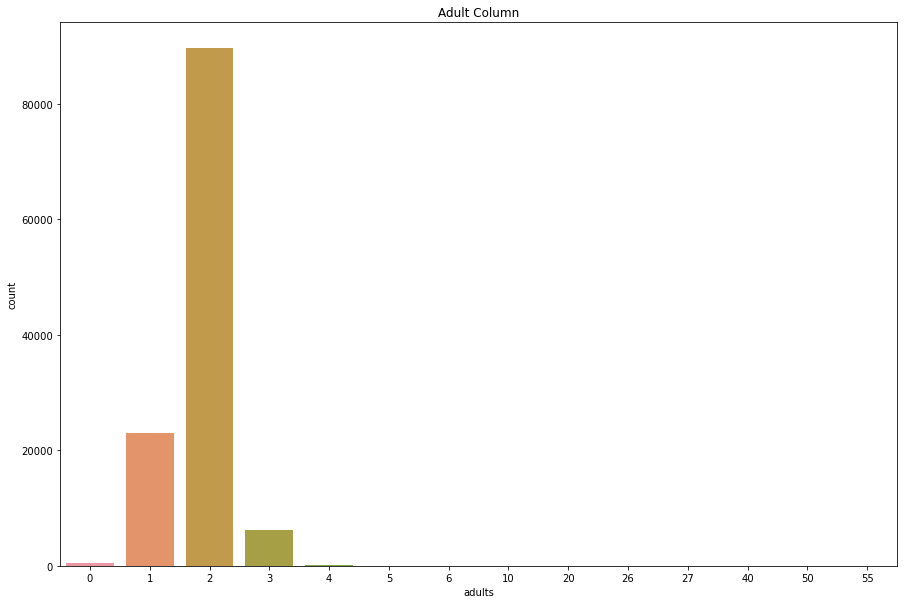

2     75.115169
1     19.287210
3      5.194740
0      0.337549
4      0.051931
26     0.004188
27     0.001675
20     0.001675
5      0.001675
55     0.000838
50     0.000838
40     0.000838
10     0.000838
6      0.000838
Name: adults, dtype: float64


In [20]:
plt.figure(figsize=(15, 10))
plt.title("Adult Column")
sns.countplot(x=full_data['adults'])
plt.show()

print(full_data['adults'].value_counts() / full_data.shape[0] * 100)

**Number of Children**

So most customers don't bring children to the hotel.

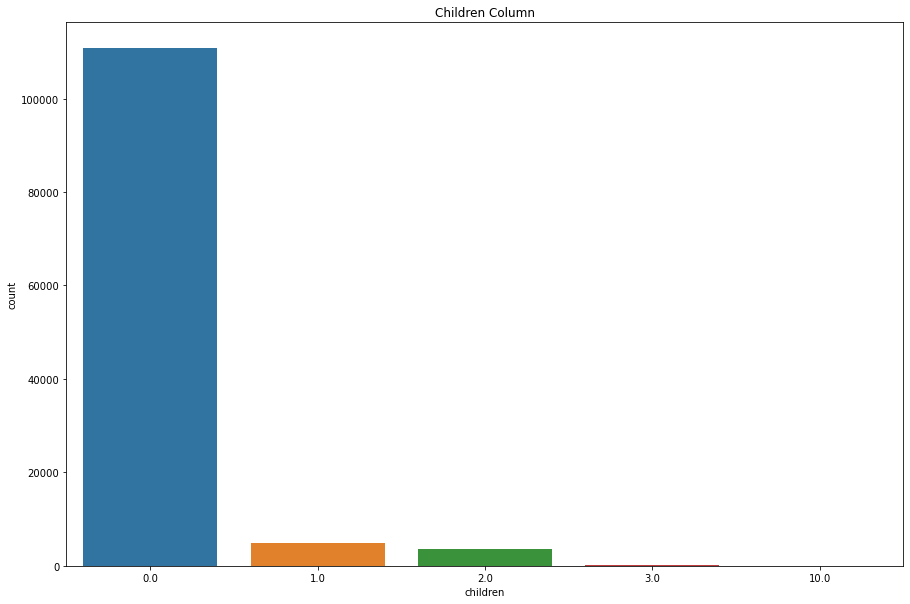

0.0     92.801742
1.0      4.071530
2.0      3.058883
3.0      0.063657
10.0     0.000838
Name: children, dtype: float64


In [21]:
plt.figure(figsize=(15, 10))
plt.title("Children Column")
sns.countplot(x=full_data['children'])
plt.show()

print(full_data['children'].value_counts() / full_data.shape[0] * 100)

**babies**

Again, most customers don't bring babdies.

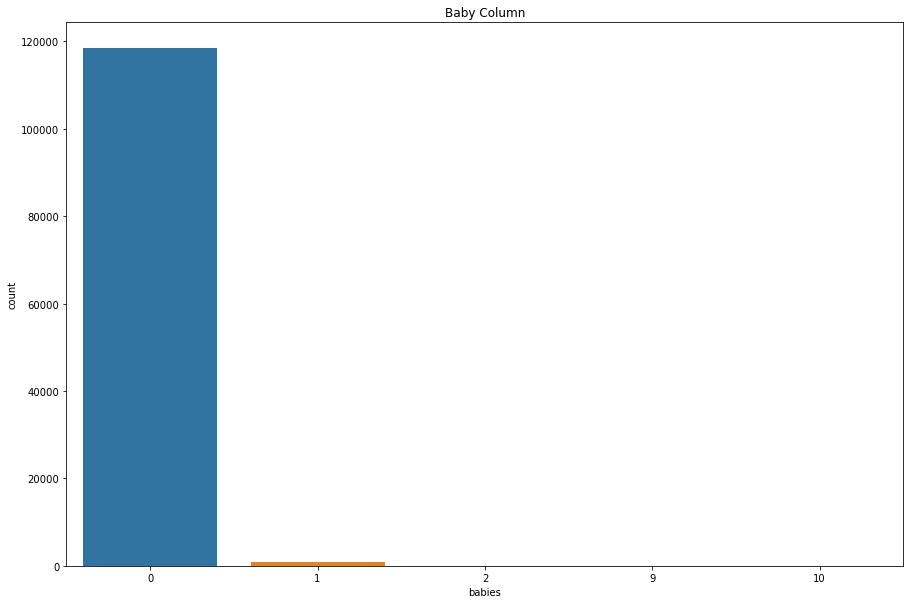

0     99.231929
1      0.753832
2      0.012564
10     0.000838
9      0.000838
Name: babies, dtype: float64


In [22]:
plt.figure(figsize=(15, 10))
plt.title("Baby Column")
sns.countplot(x=full_data['babies'])
plt.show()

print(full_data['babies'].value_counts() / full_data.shape[0] * 100)

**Country**

In [23]:
country_data = pd.DataFrame(full_data.loc[full_data["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

OK, so I just visualized some columns that I am interested in. This type of analysis did tell us some basic information about the customers such as what type of hotel they book, where they come from, and usually how many people travel together. These are all useful information, but this sort of analysis is too vague and waste of time. I would say let's now define our question and then see what we can do.

# Define Question

If I am a hotel manager, I will be very interested in knowing if a customer will cancel his hotel reservation, because that deeply correlates with the revenues our hotel can earn. Therefore, let's try to build a model to predict if someone will cancel his hotel reservation from other parameters.

**Cancellation Correlations**

Now we have defined the problem, let's first see what columns are highly associated with the is_cancelled column

In [24]:
cancel_corr = full_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

It is thus shown that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most correlated numerical variables with is_cancelled column. But to prevent possible data leakage, we should exclude booking_changes, which may include the cancellation of hotel reservation. Furthermore, reservation_status also include whether a customer cancels the booking or not. So it must also be excluded to prevent data leakage. 

Now let's look at the categorical features.

**Hotel**

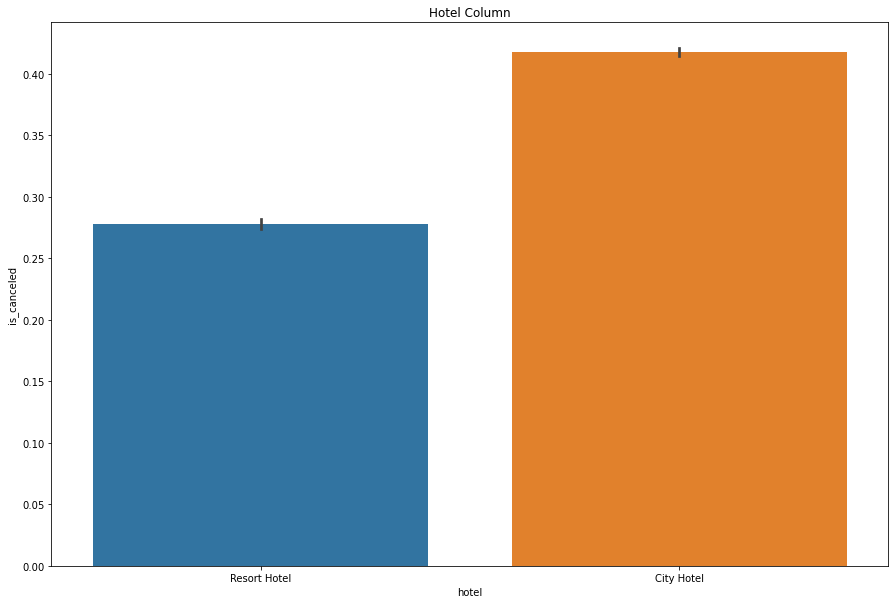

In [25]:
plt.figure(figsize=(15, 10))
plt.title("Hotel Column")
sns.barplot(x=full_data['hotel'], y=full_data['is_canceled'])
plt.show()

The type of hotel seems to affect if a customer will cancel the reservation.

**Meal**

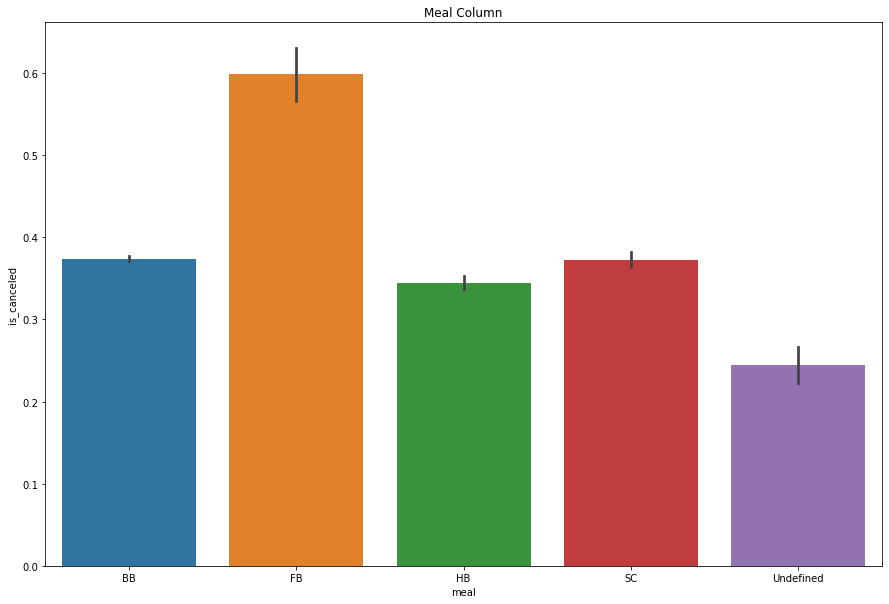

In [26]:
plt.figure(figsize=(15, 10))
plt.title("Meal Column")
sns.barplot(x=full_data['meal'], y=full_data['is_canceled'])
plt.show()

Meal also seems to affect cancelation chance. Specifically, customers who ordered full board are more likely to cancel reservations.

**Market Segment**

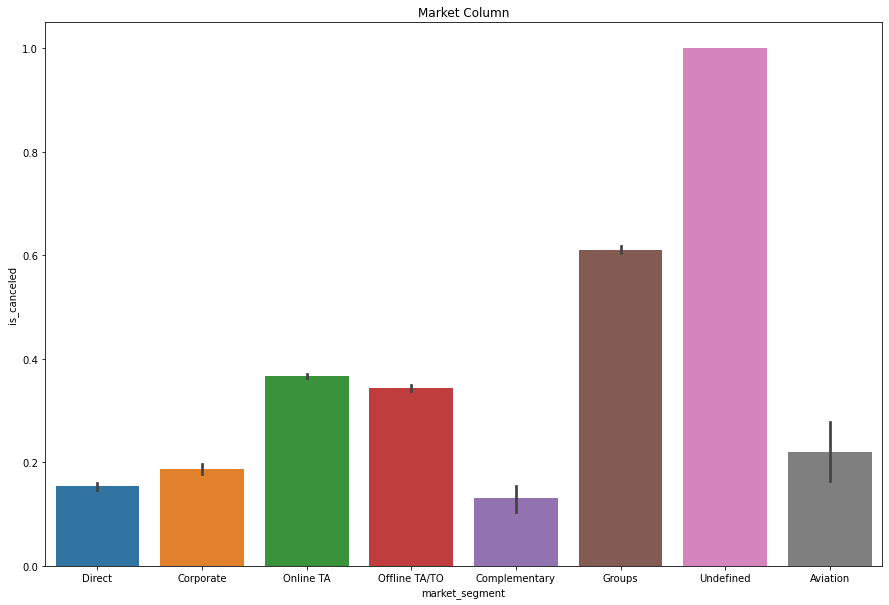

In [27]:
plt.figure(figsize=(15, 10))
plt.title("Market Column")
sns.barplot(x=full_data['market_segment'], y=full_data['is_canceled'])
plt.show()

This column also seem to affect reservation cancelation.

**Distribution Channel**

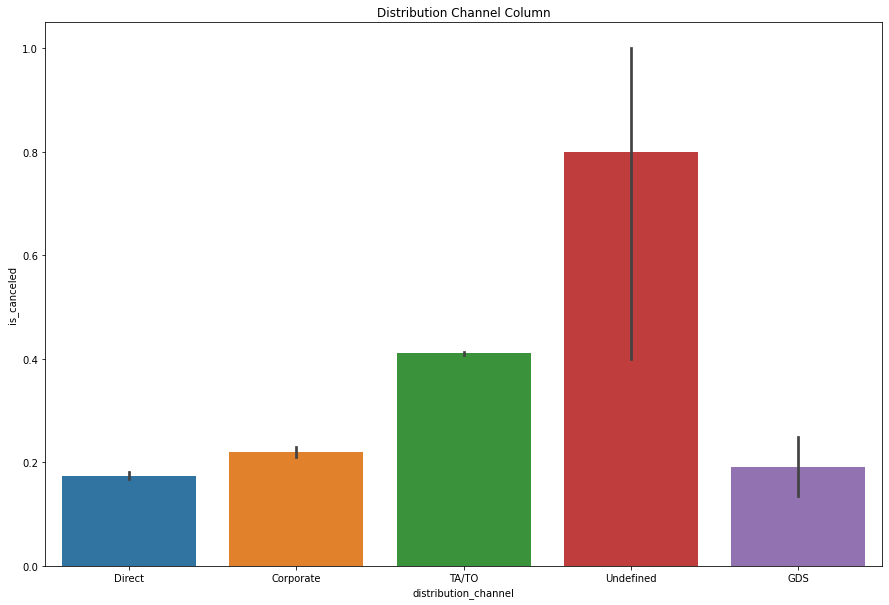

In [28]:
plt.figure(figsize=(15, 10))
plt.title("Distribution Channel Column")
sns.barplot(x=full_data['distribution_channel'], y=full_data['is_canceled'])
plt.show()

Again, has an effect

**Reserved Room Type**

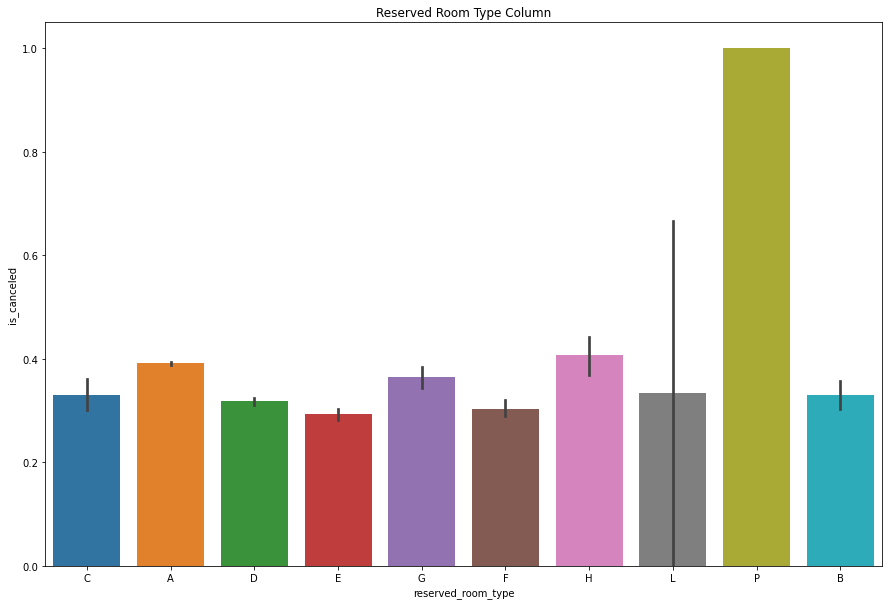

In [29]:
plt.figure(figsize=(15, 10))
plt.title("Reserved Room Type Column")
sns.barplot(x=full_data['reserved_room_type'], y=full_data['is_canceled'])
plt.show()

This column also seems to have a strong impact on cancellation. Customers who reserved P type room is more likely to cancel reservation.

**Assigned Room Type**

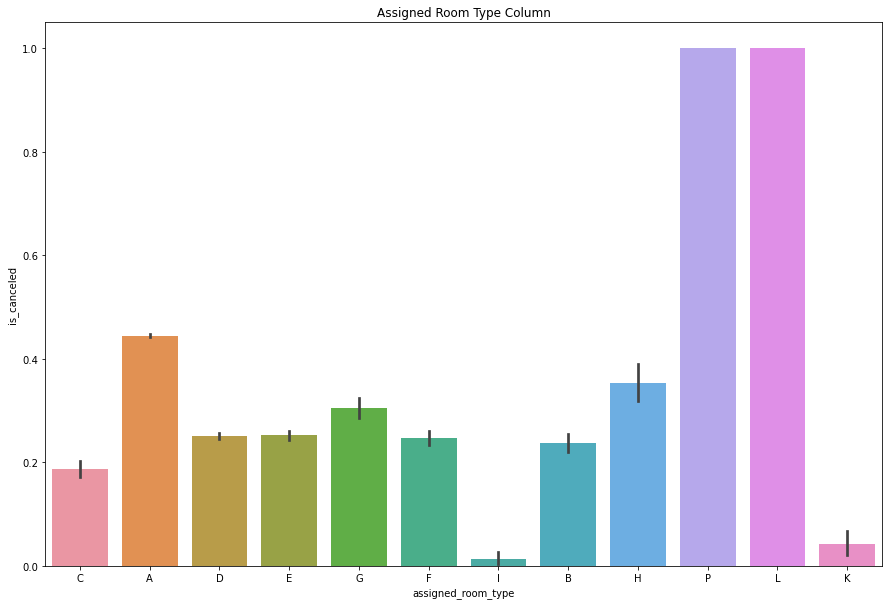

In [30]:
plt.figure(figsize=(15, 10))
plt.title("Assigned Room Type Column")
sns.barplot(x=full_data['assigned_room_type'], y=full_data['is_canceled'])
plt.show()

Customers who were assigned P or L rooms are more likely to cancel reservations.

**Deposit Type**

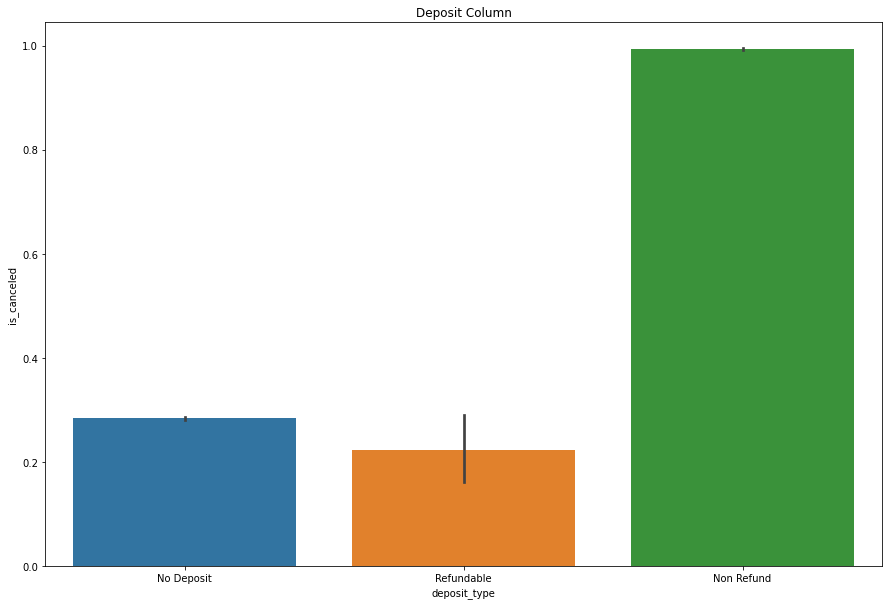

In [31]:
plt.figure(figsize=(15, 10))
plt.title("Deposit Column")
sns.barplot(x=full_data['deposit_type'], y=full_data['is_canceled'])
plt.show()

Despoit definitely indicates if a customer is more likely to cancel reservation. Visitors with non-refund type deposite are more likely to cancel booking.

**Customer Type**

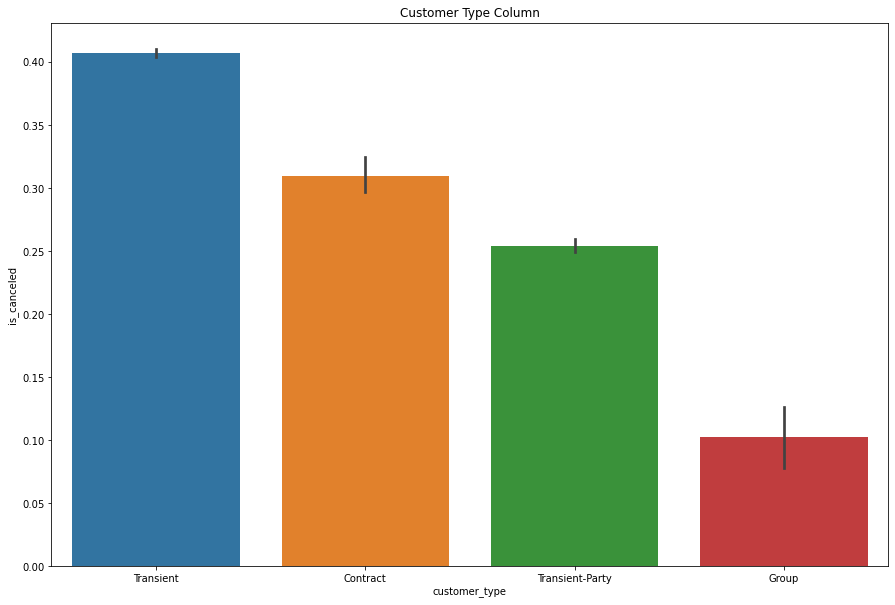

In [32]:
plt.figure(figsize=(15, 10))
plt.title("Customer Type Column")
sns.barplot(x=full_data['customer_type'], y=full_data['is_canceled'])
plt.show()

Customer type also seems to be an indicator. Specifically transient customers are more likely to cancel reservations.

# Model Selection

Before we make further analysis, let's select a machine learning model to use for our prediction. In this section I will create several simple models and see which one has the best performance. 

In [33]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","assigned_room_type", "deposit_type","customer_type"]


features = num_features + cat_features
X = full_data.drop(["is_canceled"], axis=1)[features]
y = full_data["is_canceled"]

num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1)),
               ("Ada_model", AdaBoostClassifier(random_state=42)),
               ("KNN_model", KNeighborsClassifier(n_jobs=-1))]

kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

'''
for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
'''

'\nfor name, model in base_models:\n    model_steps = Pipeline(steps=[(\'preprocessor\', preprocessor),\n                              (\'model\', model)])\n    \n    cv_results = cross_val_score(model_steps, \n                                 X, y, \n                                 cv=split,\n                                 scoring="accuracy",\n                                 n_jobs=-1)\n    \n    min_score = round(min(cv_results), 4)\n    max_score = round(max(cv_results), 4)\n    mean_score = round(np.mean(cv_results), 4)\n    std_dev = round(np.std(cv_results), 4)\n    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")\n'

We see that random forest classifier had the best performance(86.664%). Therefore, we will use this model for later predictions.

Detail: RF_model cross validation accuarcy score: 0.8664 +/- 0.0012 (std) min: 0.8646, max: 0.8676

# More Bivariate Analysis

We have found the columns that affect is_cancelled the strongest. Now let's actually visualize the correlations.

**lead-time**

We see that generally the earlier the customer books the hotel, the more likely he will cancel the reservation

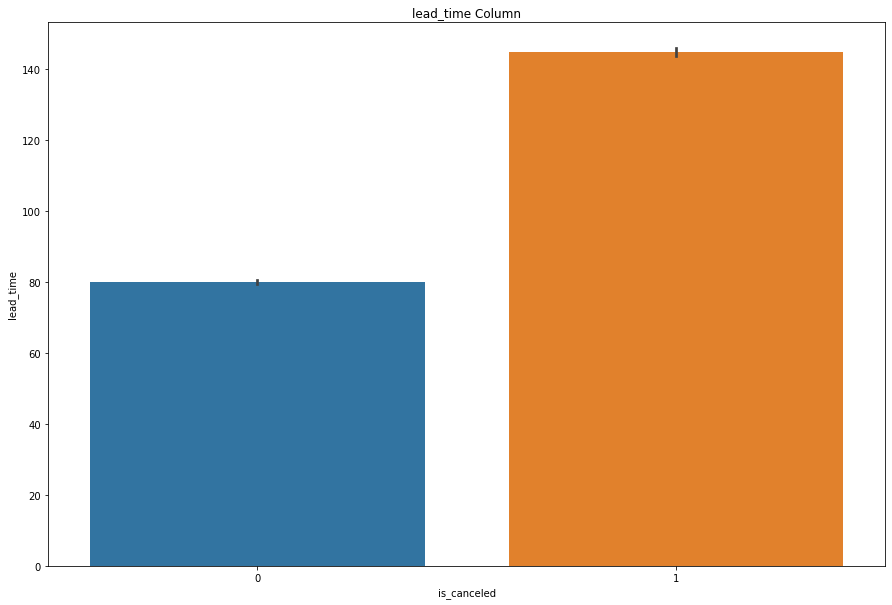

   is_canceled   lead_time
0            0   79.984687
1            1  144.848815


In [35]:
plt.figure(figsize=(15, 10))
plt.title("lead_time Column")
sns.barplot(x=full_data['is_canceled'], y=full_data['lead_time'])
plt.show()

print( full_data[["lead_time","is_canceled"]].groupby(["is_canceled"], as_index = False).mean() )

**total_of_special_requests**

We see that the more requests the customer makes, the less likely he will cancel the reservation

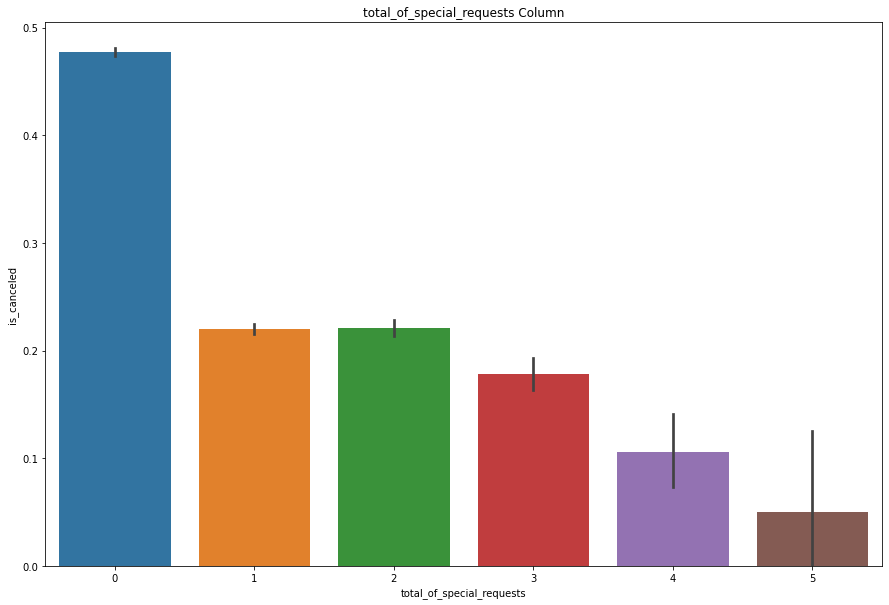

   total_of_special_requests  is_canceled
0                          0     0.477204
1                          1     0.220249
2                          2     0.220989
3                          3     0.178614
4                          4     0.105882
5                          5     0.050000


In [36]:
plt.figure(figsize=(15, 10))
plt.title("total_of_special_requests Column")
sns.barplot(x=full_data['total_of_special_requests'], y=full_data['is_canceled'])
plt.show()

print( full_data[["total_of_special_requests","is_canceled"]].groupby(["total_of_special_requests"], as_index = False).mean() )

**required_car_parking_spaces**

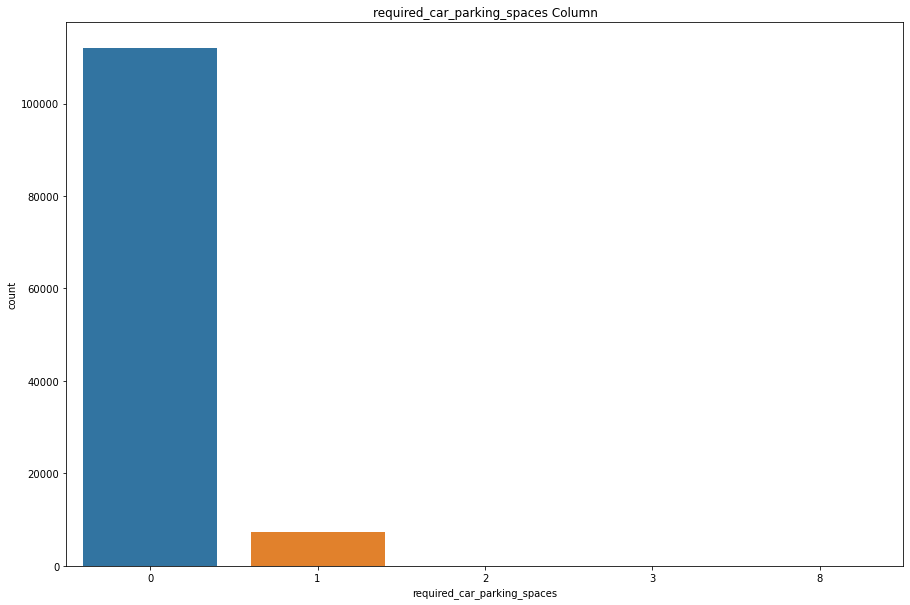

0    93.788424
1     6.183935
2     0.023453
3     0.002513
8     0.001675
Name: required_car_parking_spaces, dtype: float64


In [37]:
plt.figure(figsize=(15, 10))
plt.title("required_car_parking_spaces Column")
sns.countplot(x=full_data['required_car_parking_spaces'])
plt.show()

print(full_data['required_car_parking_spaces'].value_counts() / full_data.shape[0] * 100)

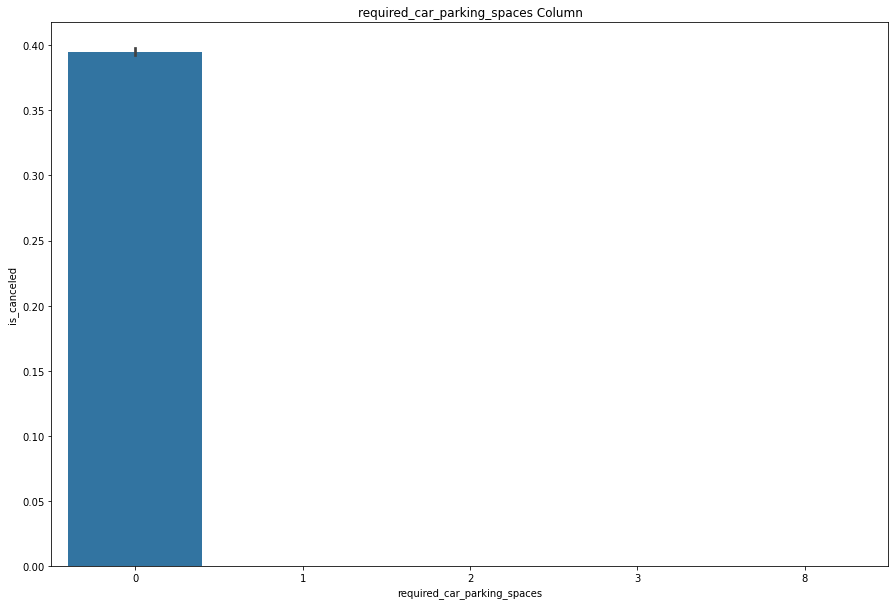

   required_car_parking_spaces  is_canceled
0                            0     0.394949
1                            1     0.000000
2                            2     0.000000
3                            3     0.000000
4                            8     0.000000


In [38]:
plt.figure(figsize=(15, 10))
plt.title("required_car_parking_spaces Column")
sns.barplot(x=full_data['required_car_parking_spaces'], y=full_data['is_canceled'])
plt.show()

print( full_data[["required_car_parking_spaces","is_canceled"]].groupby(["required_car_parking_spaces"], as_index = False).mean() )

So we see that if the customer requires at least one car parking space, the chance to cancel the reservation is very small. I say we can actually modify this column to only show if a customer makes a requirement(denoted as 1) or not(denoted as 0), which perhaps is more straightforward to our model?

In [39]:
full_data.loc[full_data['required_car_parking_spaces'] != 0, 'required_car_parking_spaces'] = 1

After the change:

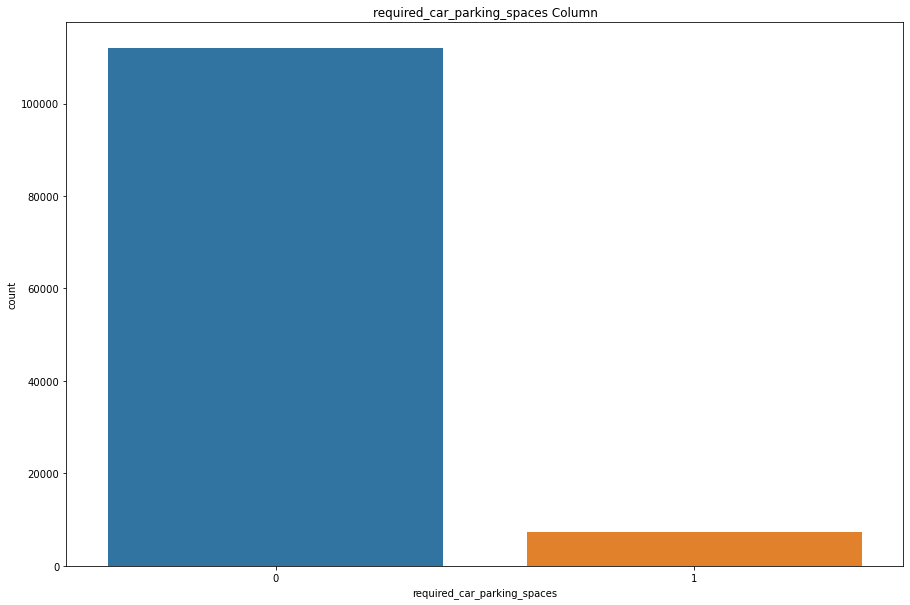

0    93.788424
1     6.211576
Name: required_car_parking_spaces, dtype: float64


In [40]:
plt.figure(figsize=(15, 10))
plt.title("required_car_parking_spaces Column")
sns.countplot(x=full_data['required_car_parking_spaces'])
plt.show()

print(full_data['required_car_parking_spaces'].value_counts() / full_data.shape[0] * 100)

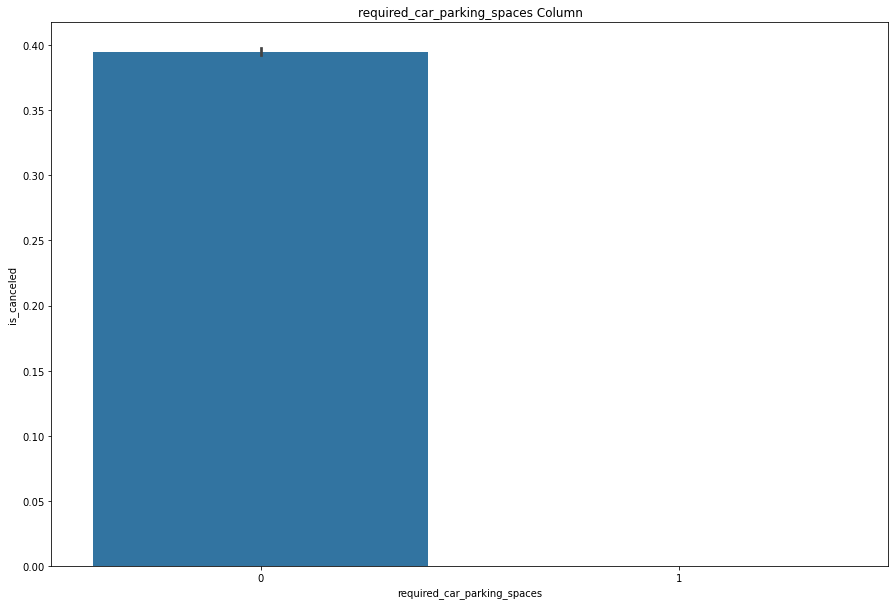

   required_car_parking_spaces  is_canceled
0                            0     0.394949
1                            1     0.000000


In [41]:
plt.figure(figsize=(15, 10))
plt.title("required_car_parking_spaces Column")
sns.barplot(x=full_data['required_car_parking_spaces'], y=full_data['is_canceled'])
plt.show()

print( full_data[["required_car_parking_spaces","is_canceled"]].groupby(["required_car_parking_spaces"], as_index = False).mean() )

Let's see if this would make any difference to our model's prediction score.

In [42]:
X = full_data.drop(["is_canceled"], axis=1)[features]
y = full_data["is_canceled"]

model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=42,n_jobs=-1))])
    
cv_results = cross_val_score(model_steps, 
                             X, y, 
                             cv=split,
                             scoring="accuracy",
                             n_jobs=-1)

min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"RF Model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

RF Model cross validation accuarcy score: 0.8696 +/- 0.0011 (std) min: 0.8678, max: 0.8703


Nice! We see an improvement in accuracy, which means this modification actually works!

**previous_cancellations**

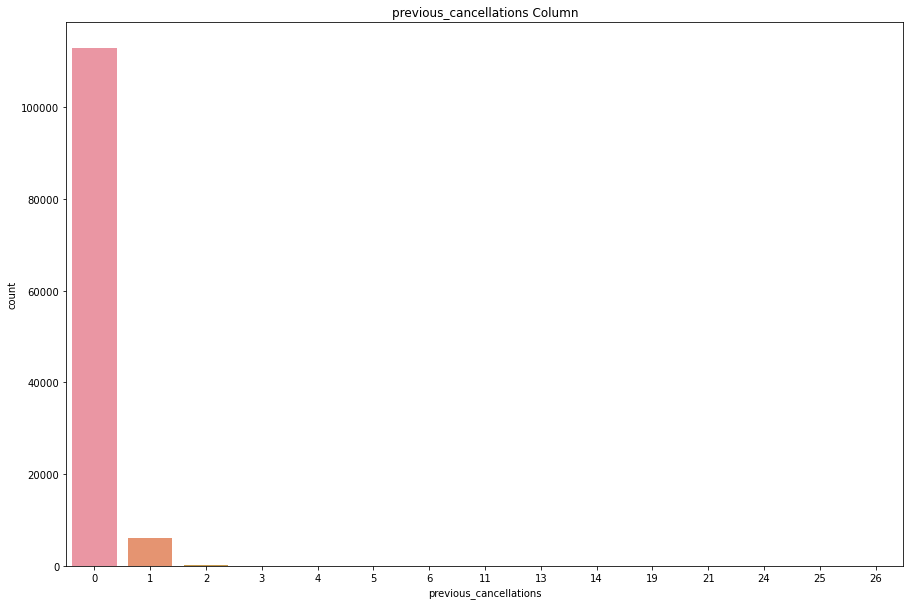

0     94.569059
1      5.068264
2      0.097161
3      0.054443
24     0.040204
11     0.029316
4      0.025965
26     0.021777
25     0.020940
6      0.018427
19     0.015914
5      0.015914
14     0.011726
13     0.010051
21     0.000838
Name: previous_cancellations, dtype: float64


In [43]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.countplot(x=full_data['previous_cancellations'])
plt.show()

print(full_data['previous_cancellations'].value_counts() / full_data.shape[0] * 100)

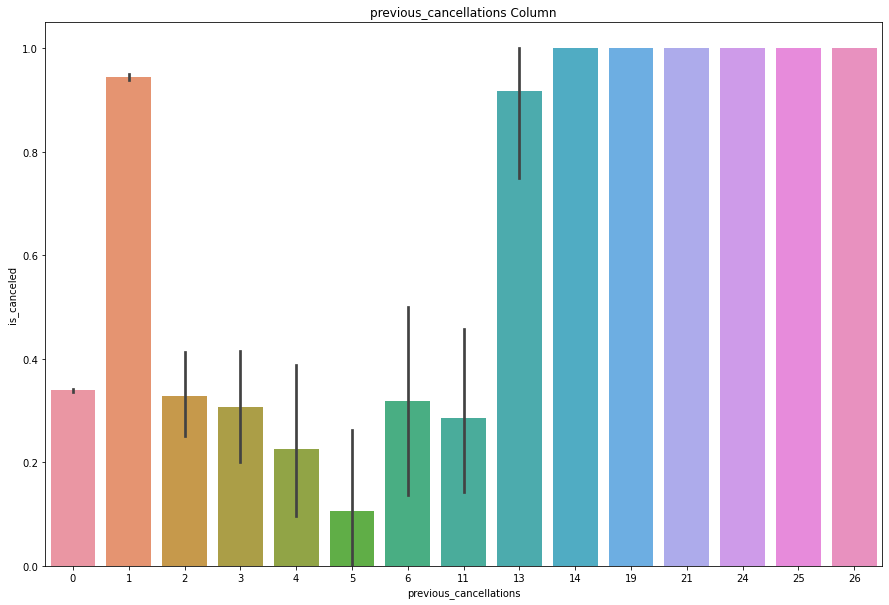

    previous_cancellations  is_canceled
0                        0     0.339061
1                        1     0.944307
2                        2     0.327586
3                        3     0.307692
4                        4     0.225806
5                        5     0.105263
6                        6     0.318182
7                       11     0.285714
8                       13     0.916667
9                       14     1.000000
10                      19     1.000000
11                      21     1.000000
12                      24     1.000000
13                      25     1.000000
14                      26     1.000000


In [44]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.barplot(x=full_data['previous_cancellations'], y=full_data['is_canceled'])
plt.show()

print( full_data[["previous_cancellations","is_canceled"]].groupby(["previous_cancellations"], as_index = False).mean() )

So we see that if the number of previous_cancellations is 1 or above 12, the chance of canceling the reservation is very high. This makes me wonder that will the prediction be better if I apply the same modification as parking space. Let's find out

In [45]:
temp_previous_cancel = full_data['previous_cancellations'].copy()

In [46]:
full_data.loc[(full_data['previous_cancellations'] == 1) | (full_data['previous_cancellations'] >= 13), 'previous_cancellations'] = 1
full_data.loc[(full_data['previous_cancellations'] != 1) & (full_data['previous_cancellations'] < 13), 'previous_cancellations'] = 0

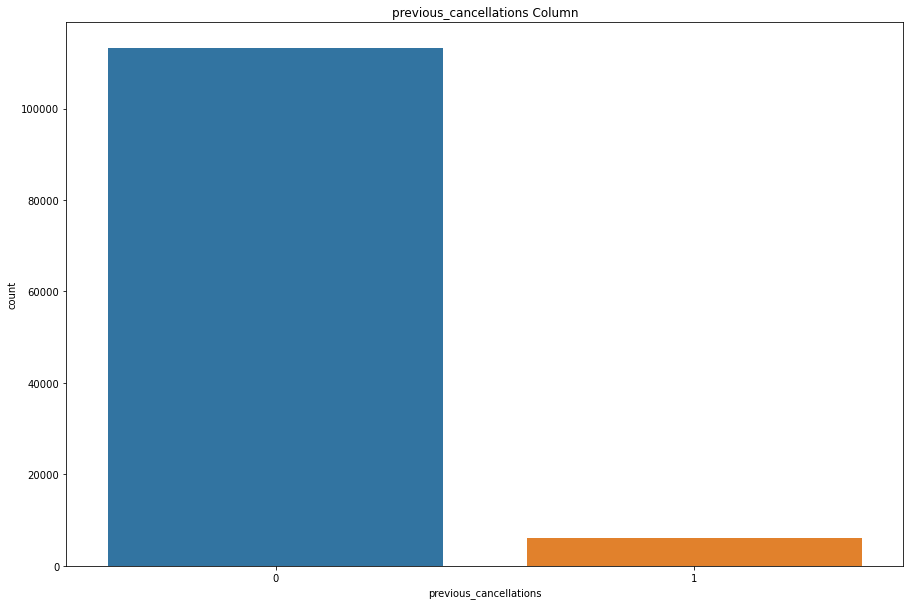

0    94.810286
1     5.189714
Name: previous_cancellations, dtype: float64


In [47]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.countplot(x=full_data['previous_cancellations'])
plt.show()

print(full_data['previous_cancellations'].value_counts() / full_data.shape[0] * 100)

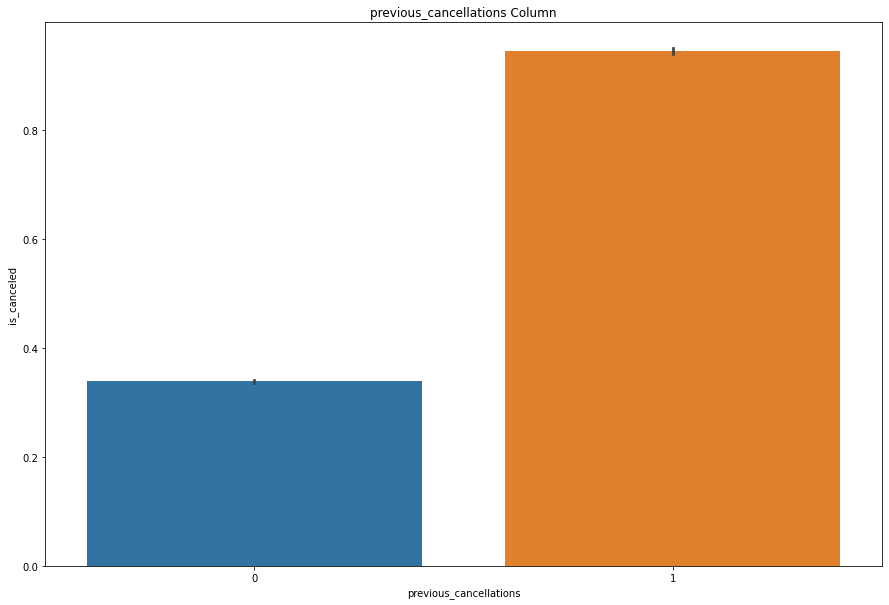

   previous_cancellations  is_canceled
0                       0     0.338940
1                       1     0.945449


In [48]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.barplot(x=full_data['previous_cancellations'], y=full_data['is_canceled'])
plt.show()

print( full_data[["previous_cancellations","is_canceled"]].groupby(["previous_cancellations"], as_index = False).mean() )

Now our model's performance is:

In [49]:
X = full_data.drop(["is_canceled"], axis=1)[features]
y = full_data["is_canceled"]

model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=42,n_jobs=-1))])
    
cv_results = cross_val_score(model_steps, 
                             X, y, 
                             cv=split,
                             scoring="accuracy",
                             n_jobs=-1)

min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"RF Model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

RF Model cross validation accuarcy score: 0.8694 +/- 0.0013 (std) min: 0.8682, max: 0.8711


Sadly, this actually makes the performance worse, so let's undo this change. 

In [50]:
full_data['previous_cancellations'] = temp_previous_cancel

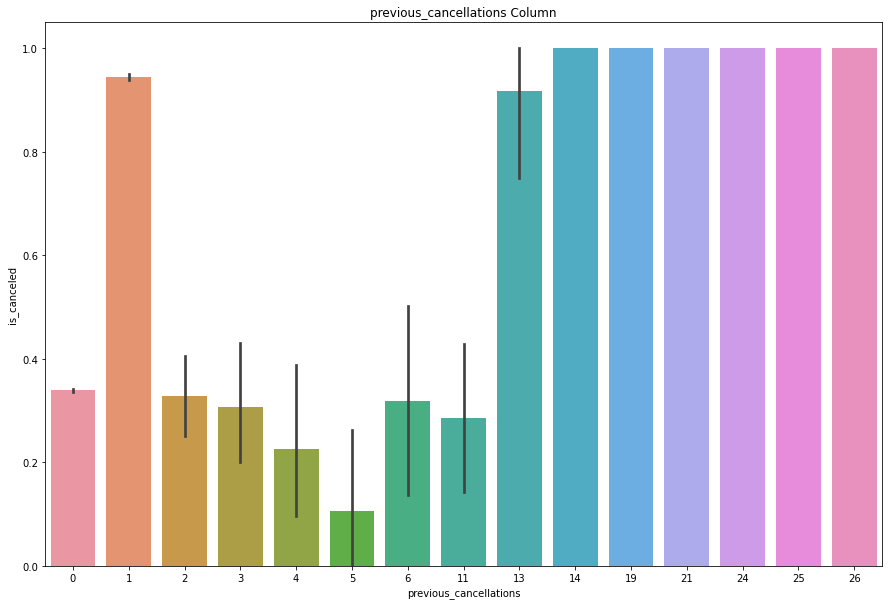

    previous_cancellations  is_canceled
0                        0     0.339061
1                        1     0.944307
2                        2     0.327586
3                        3     0.307692
4                        4     0.225806
5                        5     0.105263
6                        6     0.318182
7                       11     0.285714
8                       13     0.916667
9                       14     1.000000
10                      19     1.000000
11                      21     1.000000
12                      24     1.000000
13                      25     1.000000
14                      26     1.000000


In [51]:
plt.figure(figsize=(15, 10))
plt.title("previous_cancellations Column")
sns.barplot(x=full_data['previous_cancellations'], y=full_data['is_canceled'])
plt.show()

print( full_data[["previous_cancellations","is_canceled"]].groupby(["previous_cancellations"], as_index = False).mean() )

In [52]:
X = full_data.drop(["is_canceled"], axis=1)[features]
y = full_data["is_canceled"]

model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=42,n_jobs=-1))])
    
cv_results = cross_val_score(model_steps, 
                             X, y, 
                             cv=split,
                             scoring="accuracy",
                             n_jobs=-1)

min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"RF Model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

RF Model cross validation accuarcy score: 0.8696 +/- 0.0011 (std) min: 0.8678, max: 0.8703


# Final Tuning

Now we have done all the modifications. Let's finally adjust the hyperparameters and make the final predictions.

In [53]:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8712 +/- 0.0019 (std) min: 0.8689, max: 0.8742


So our final perdiction accyracy is 87.12%.